In [1]:
import networkx as nx
import anywidget
from pathlib import Path
from traitlets import List

G = nx.tutte_graph()

In [2]:
points = nx.spring_layout(G, dim=3)
points

{0: array([ 0.06833442,  0.08429236, -0.11255344]),
 1: array([0.01661421, 0.18840278, 0.31484851]),
 2: array([ 0.23692292, -0.28208785, -0.25729938]),
 3: array([-0.08009326,  0.33454934, -0.40425394]),
 4: array([0.03024813, 0.14183564, 0.61950503]),
 5: array([0.18669567, 0.00702886, 0.72456572]),
 6: array([ 0.24061369, -0.15831488,  0.4902953 ]),
 7: array([ 0.25461331, -0.49488654,  0.24911563]),
 8: array([ 0.40556533, -0.74460541,  0.10109283]),
 9: array([ 0.4977365 , -0.76939586, -0.1229569 ]),
 10: array([ 0.4084941 , -0.55932955, -0.27486622]),
 11: array([ 0.23048728, -0.54131273, -0.38522853]),
 12: array([ 0.0492516 , -0.66482404, -0.34373558]),
 13: array([-0.1151707 , -0.44051043, -0.25446955]),
 14: array([ 0.08297014, -0.61398664, -0.01180021]),
 15: array([-0.32902725, -0.08677492, -0.37098491]),
 16: array([-0.48731597,  0.10621595, -0.59888163]),
 17: array([-0.45507878,  0.3044633 , -0.74961013]),
 18: array([-0.24620947,  0.41281628, -0.64973325]),
 19: array([

In [3]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15), (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)])

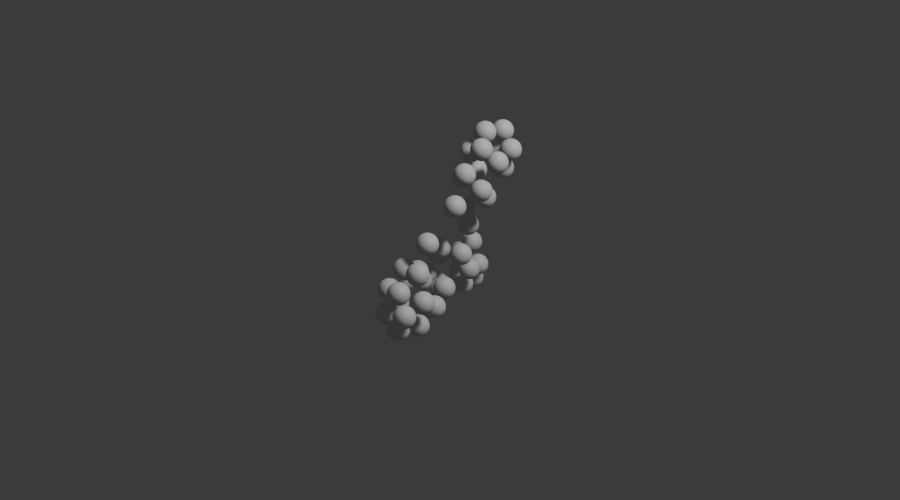

In [7]:
import bpy
import numpy as np

# Select all objects except the camera and light
for obj in bpy.data.objects:
    if obj.type not in {'CAMERA', 'LIGHT'}:
        obj.select_set(True)
bpy.ops.object.delete()


data = points

# Create spheres at the points
for key, coords in data.items():
    bpy.ops.mesh.primitive_uv_sphere_add(location=(coords[0], coords[1], coords[2]), radius=0.1)
    sphere = bpy.context.object
    sphere.name = f"point{key}"

path = "/tmp/test.png"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)

bpy.context.scene.render.resolution_x = 900
bpy.context.scene.render.resolution_y = 500

from IPython.display import display, Image
display(Image(filename=path))

In [6]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')